In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display,Latex

In [16]:
data=pd.read_csv("nptel_a.csv")

In [17]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
    return wt_matrix,self.b
    #print(max_accuracy)
    
    """plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.ylim([0, 1])
    plt.show()"""

In [18]:
data

,x1,x2,y
0,1,1,1
1,1,2,1
2,1,4,1
3,2,2,1
4,2,4,0
5,3,1,1
6,3,3,0
7,4,1,0
8,4,4,0


In [19]:
X_train=data.iloc[:,:2]
Y_train=data.iloc[:,-1:]
X_train.shape

(9, 2)

In [20]:
from sklearn.metrics import accuracy_score
perceptron = Perceptron()

In [21]:
wt_matrix,b = perceptron.fit(X_train.values, Y_train.values,epochs = 50, lr = 0.01)
#perceptron.predict(X_test)

In [22]:
print(wt_matrix[-1])

[-0.04 -0.03]


In [23]:
X_test=np.array([[3,2]])
perceptron.predict(X_test)

array([1])

In [24]:
def slope_intercept(w,b):
    m=-(w[0]/w[1])
    c=b/w[1]
    return (round(m,2),round(c,2))

In [25]:
m,c=slope_intercept(wt_matrix[-1],b)

In [65]:
"""fig, axs= plt.subplots(figsize=(4,4))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)

x_axis=list(range(0,6))
x_axis=np.array(x_axis)
    
axs.scatter(data['x1'],data['x2'],c=data['y'],s=200,cmap=matplotlib.colors.ListedColormap(['red','purple']))
axs.scatter(3,2,s=200,color='yellow')
axs.plot(x_axis,m*x_axis+c, '-r', color="blue")
plt.grid(True)
plt.xlim(0,  5)
plt.ylim(0,  5)

plt.show()""";

In [66]:
data[data.y==1]

,x1,x2,y
0,1,1,1
1,1,2,1
2,1,4,1
3,2,2,1
5,3,1,1


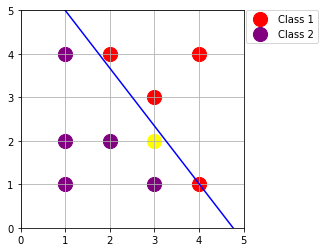

In [67]:
fig, axs= plt.subplots(figsize=(4,4))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)

x_axis=list(range(0,6))
x_axis=np.array(x_axis)
    
axs.scatter(data[data.y==0]['x1'],data[data.y==0]['x2'],s=200,color='red',label='Class 1')
axs.scatter(data[data.y==1]['x1'],data[data.y==1]['x2'],s=200,color='purple',label='Class 2')
axs.scatter(3,2,s=200,color='yellow')
axs.plot(x_axis,m*x_axis+c, '-r', color="blue")
plt.grid(True)
plt.xlim(0,  5)
plt.ylim(0,  5)
plt.legend(loc=(1.01, 0.85))
plt.show()